In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
pip install seaborn

In [5]:
pip install matplotlib

   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---- ----------------------------------- 0.8/7.8 MB 4.3 MB/s eta 0:00:02
   -------- ------------------------------- 1.6/7.8 MB 4.0 MB/s eta 0:00:02
   -------------- ------------------------- 2.9/7.8 MB 4.7 MB/s eta 0:00:02
   --------------------- ------------------ 4.2/7.8 MB 5.0 MB/s eta 0:00:01
   ---------------------------- ----------- 5.5/7.8 MB 5.4 MB/s eta 0:00:01
   ------------------------------------ --- 7.1/7.8 MB 5.9 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 5.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ----------------------- ---------------- 1.3/2.2 MB 8.0 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 7.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ------------------------ --------------- 1.6/2.6 MB 7.7 MB/s eta 0:00:01
   ------------------------------

In [3]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.5 MB 3.5 MB/s eta 0:00:04
   ------ --------------------------------- 1.8/11.5 MB 5.8 MB/s eta 0:00:02
   ------------- -------------------------- 3.9/11.5 MB 7.0 MB/s eta 0:00:02
   ----------------- ---------------------- 5.0/11.5 MB 7.2 MB/s eta 0:00:01
   --------------------- ------------------ 6.3/11.5 MB 6.6 MB/s eta 0:00:01
   --------------------------- ------------ 7.9/11.5 MB 6.8 MB/s eta 0:00:01
   ------------------------------- -------- 9.2/11.5 MB 6.6 MB/s eta 0:00:01
   ------------------------------------ --- 10.5/11.5 MB 6.6 MB/s eta 0:00:01
   ---------------------------------------- 11.5/11.5 MB 6.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/12.6 MB 7.8 MB/s eta 0:00:02
   ---------- ----------------------------- 3.1/12.6 MB 7.5 MB/s eta 0:00:02
   --------

In [3]:
df = pd.read_csv("F:/Entry/house_price.csv")

In [10]:
df.info()# Check data types and non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [11]:
df.head()  # View the first few rows

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [12]:
df.describe()# Summary statistics for numerical columns

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [14]:
df.isnull().sum()# Check for missing values

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [4]:
df['price_per_sqft'] = df['price']/df['total_sqft'] # Assuming price and total_sqft columns exist

In [5]:
# Calculate mean and standard deviation
mean = df['price_per_sqft'].mean()
std = df['price_per_sqft'].std()

In [6]:
# Define upper and lower limits for outliers
upper_limit = mean + 3 * std
lower_limit = mean - 3 * std

In [7]:
# Trim or remove outliers
df_trimmed = df[(df['price_per_sqft'] <= upper_limit) & (df['price_per_sqft'] >= lower_limit)]

In [9]:
# Alternatively, you can cap outliers to the upper and lower limit
np.where(df['price_per_sqft'] > upper_limit, upper_limit,
                                       np.where(df['price_per_sqft'] < lower_limit, lower_limit, df['price_per_sqft']))

array([0.03699811, 0.04615385, 0.04305556, ..., 0.05258545, 0.10407336,
       0.03090909])

In [4]:
# Calculate 1st and 99th percentiles
lower_bound = df['price_per_sqft'].quantile(0.01)
upper_bound = df['price_per_sqft'].quantile(0.99)


In [5]:
# Remove outliers
df_no_outliers_percentile = df[(df['price_per_sqft'] >= lower_bound) & (df['price_per_sqft'] <= upper_bound)]
print(f"Removed {len(df) - len(df_no_outliers_percentile)} outliers using percentile method.")

Removed 259 outliers using percentile method.


In [6]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)


In [7]:
# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

In [8]:
# Define upper and lower bounds
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

In [10]:
# Remove outliers
df_no_outliers_iqr = df[(df['price_per_sqft'] >= lower_bound) & (df['price_per_sqft'] <= upper_bound)]
print(f"Removed {len(df) - len(df_no_outliers_iqr)} outliers using IQR Method.")

Removed 1265 outliers using IQR Method.


In [12]:
pip install scipy

   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/44.5 MB ? eta -:--:--
    --------------------------------------- 0.8/44.5 MB 2.6 MB/s eta 0:00:18
   - -------------------------------------- 1.6/44.5 MB 2.8 MB/s eta 0:00:16
   - -------------------------------------- 2.1/44.5 MB 2.9 MB/s eta 0:00:15
   -- ------------------------------------- 2.9/44.5 MB 3.0 MB/s eta 0:00:14
   --- ------------------------------------ 3.4/44.5 MB 3.0 MB/s eta 0:00:14
   --- ------------------------------------ 4.2/44.5 MB 3.1 MB/s eta 0:00:14
   ---- ----------------------------------- 5.0/44.5 MB 3.2 MB/s eta 0:00:13
   ----- ---------------------------------- 5.8/44.5 MB 3.2 MB/s eta 0:00:13
   ----- ---------------------------------- 6.3/44.5 MB 3.2 MB/s eta 0:00:13
   ------ --------------------------------- 7.1/44.5 MB 3.2 MB/s eta 0:00:12
   ------ --------------------------------- 7.3/44.5 MB 3.2 MB/s eta 0:00:12
   ------- --

In [13]:
from scipy import stats

In [14]:
# Calculate Z-scores
df['z_score'] = stats.zscore(df['price_per_sqft'])

In [15]:
# Remove outliers based on Z-score
df_no_outliers_z = df[(df['z_score'] <= 3) & (df['z_score'] >= -3)]

In [16]:
# Drop the Z-score column
df_no_outliers_z = df_no_outliers_z.drop(columns = ['z_score'])
print(f"Removed {len(df) - len(df_no_outliers_z)} outliers using Z-score method.")

Removed 5 outliers using Z-score method.


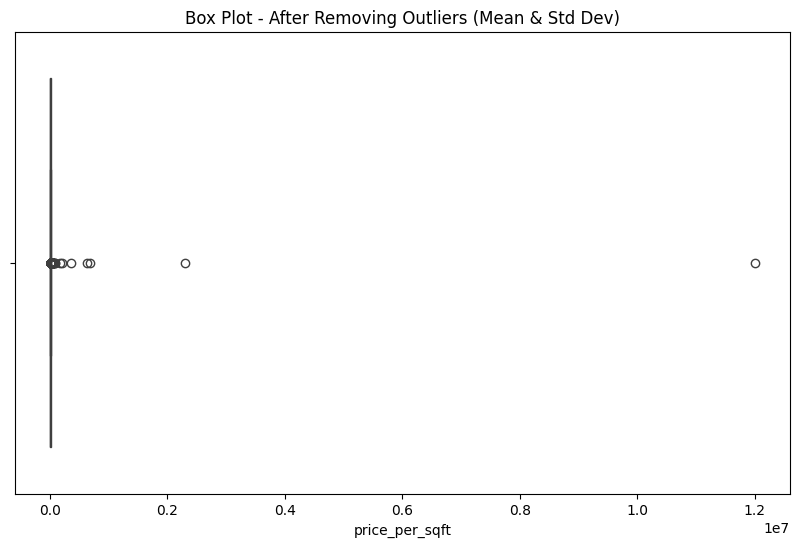

In [19]:
# Box plot for the original data (with outliers)
plt.figure(figsize = (10,6))
sns.boxplot(x = df['price_per_sqft'])
plt.title('Box Plot - After Removing Outliers (Mean & Std Dev)')
plt.show()

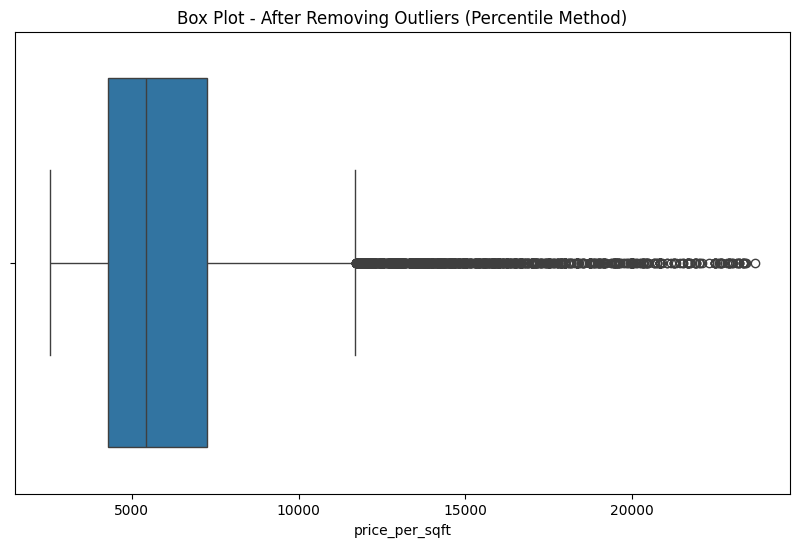

In [21]:
# Box plot for the data after removing outliers using Percentile Method
plt.figure(figsize=(10,6))
sns.boxplot(x=df_no_outliers_percentile['price_per_sqft'])
plt.title('Box Plot - After Removing Outliers (Percentile Method)')
plt.show()

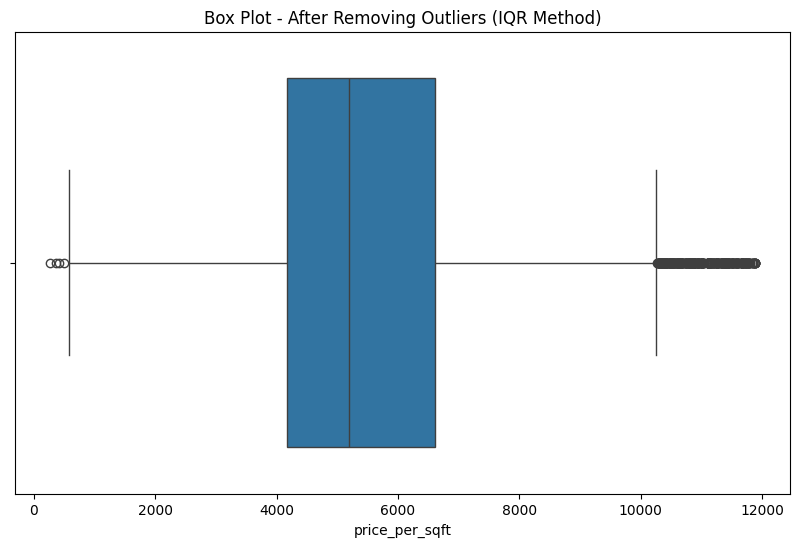

In [24]:
# Box plot for the data after removing outliers using IQR Method
plt.figure(figsize=(10,6))
sns.boxplot(x=df_no_outliers_iqr['price_per_sqft'])
plt.title('Box Plot - After Removing Outliers (IQR Method)')
plt.show()           

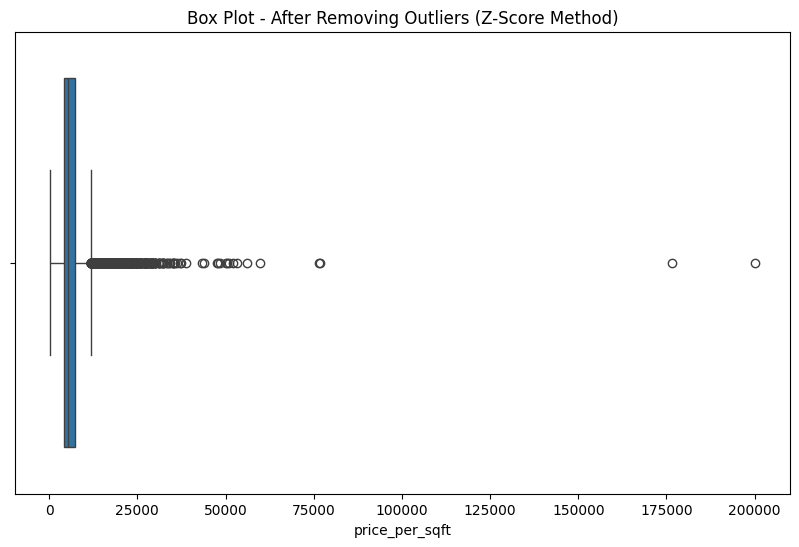

In [25]:
# Box plot for the data after removing outliers using Z-Score Method
plt.figure(figsize=(10,6))
sns.boxplot(x=df_no_outliers_z['price_per_sqft'])
plt.title('Box Plot - After Removing Outliers (Z-Score Method)')
plt.show()

In [26]:
from scipy.stats import skew, kurtosis

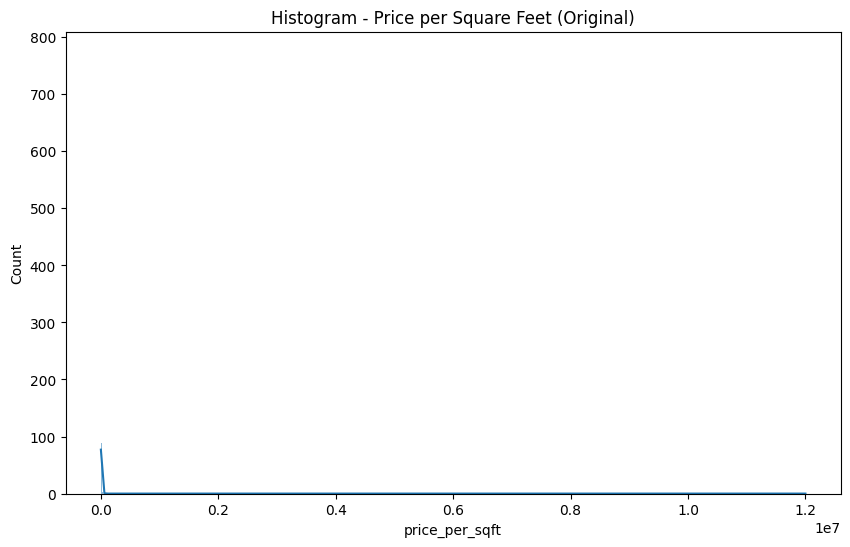

In [27]:
# Draw histogram for price per square feet column
plt.figure(figsize=(10,6))
sns.histplot(df['price_per_sqft'], kde = True)
plt.title('Histogram - Price per Square Feet (Original)')
plt.show()

In [29]:
# Check skewness and kurtosis before transformation
original_skewness = skew(df['price_per_sqft'])
original_kurtosis = kurtosis(df['price_per_sqft'])

print(f"Skewness (Before): {original_skewness}")
print(f"Kurtosis (Before): {original_kurtosis}")


Skewness (Before): 108.26875024325159
Kurtosis (Before): 12090.633538860382


In [31]:
# Select only numerical columns from the DataFrame
numeric_df = df.select_dtypes(include=['float64','int64'])

In [32]:
# Compute the correlation matrix for numerical columns
correlation_matrix = numeric_df.corr()

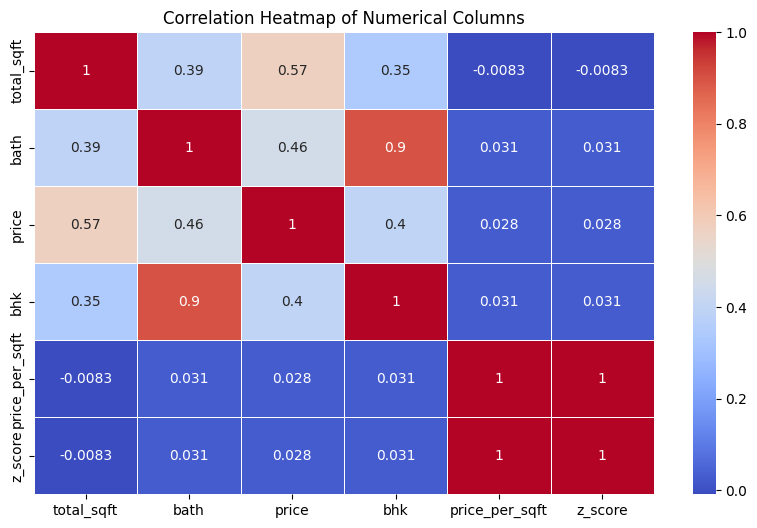

In [34]:
# Plot the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', linewidth=0.5)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

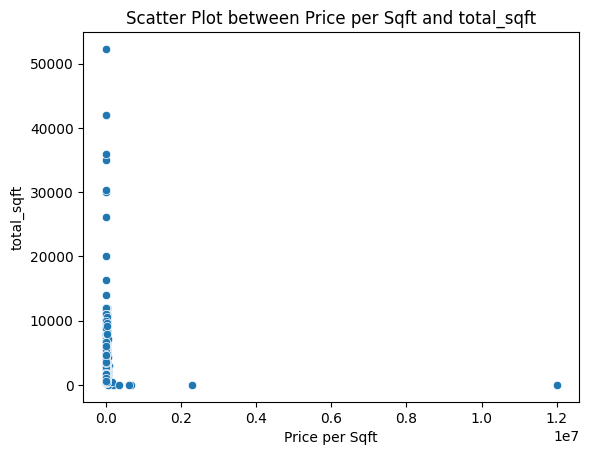

In [36]:
# Example: Scatter plot between 'price_per_sqft' and 'total_sqft'
sns.scatterplot(data=df, x = 'price_per_sqft', y = 'total_sqft')
plt.title('Scatter Plot between Price per Sqft and total_sqft')  
plt.xlabel('Price per Sqft')
plt.ylabel('total_sqft')
plt.show()               